## Explorative Data Analysis

We start importing libraries which will be useful to perform Exploratory Data Analysis (EDA) on the datasets we will use to train and test our models:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Now let's import test and train datasets and take a glimpse of both:

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [4]:
pred_df = pd.read_csv("test.csv", index_col=0)
pred_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127037 entries, 381110 to 508146
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 10.7+ MB


Both dataframes have these variables in common, in particular:

- `Gender`: Gender of the customer;
- `Age`: Age of the customer;
- `Driving_License`:
    - `0` : Customer doesn't have DL;
    - `1` : Customer has DL.
- `Region_Code`: Unique code for the region of the customer;
- `Previously_Insured`:
    - `0` : Customer doesn't have Vehicle Insurance;
    - `1` : Customer has Vehicle Insurance.
- `Vehicle_Age`: Age of the Vehicle;
- `Vehicle_Damage`:
    - `0` : Customer's vehicle has not been damaged in the past;
    - `1` : Customer's vehicle has been damaged in the past.
- `Annual_Premium`: The amount customer needs to pay as premium yearly.
- `Policy_Sales_Channel`: Anonymized Code for the channel of outreaching to the customer (i.e. Agents, Phone, Mail, etc.);
- `Vintage`: Time (in day) sinche the Customer has been associated with the company.

`id` is only used as reference for customer, so it will be the dataframe index.

`Response` is only included in `df` since it's out target variable. It has two level:
    - `0` : Customer isn't interested in Vehicle Insurance provided by the company;
    - `1` : Customer is interested in Vehicle Insurance provided by the company.

Let's check for missing or null values (NA):

In [6]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
pred_df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

No missing values have been found.

We can now take a closer look at the variables. Let's start by the contnuous ones:

In [8]:
con = df[["Age", "Annual_Premium", "Vintage"]]
con.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Between categorical variables, `Gender`, `Vehicle_Damage` and `Vehicle_Age` have string values. We nedd to encode them using two different methods:
- For `Gender`and `Vehicle_Damage` we use **Label Encoding**;
- For `Vehicle_Age`, which belongs to ordinal type, we use **Ordinal Encoding**.

In [9]:
gndr_map={"Female":0, "Male":1}
df["Gender"]=df["Gender"].map(gndr_map)
pred_df["Gender"]=pred_df["Gender"].map(gndr_map)

v_dmg_map={"No":0, "Yes":1}
df["Vehicle_Damage"]=df["Vehicle_Damage"].map(v_dmg_map)
pred_df["Vehicle_Damage"]=pred_df["Vehicle_Damage"].map(v_dmg_map)

v_age_map={"< 1 Year":1, "1-2 Year":2, "> 2 Years":3}
df["Vehicle_Age"]=df["Vehicle_Age"].map(v_age_map)
pred_df["Vehicle_Age"]=pred_df["Vehicle_Age"].map(v_age_map)

In [10]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,1,2,0,30170.0,26.0,88,0
381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [11]:
pred_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
381111,1,40,1,28.0,0,2,1,33762.0,7.0,111
381112,1,47,1,28.0,0,2,1,40050.0,124.0,199
381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
508143,0,38,1,28.0,0,2,1,28700.0,122.0,165
508144,1,21,1,46.0,1,1,0,29802.0,152.0,74


It seems that `Region_Code` and `Policy_Sales_Channel` have too many levels as we can see:

In [12]:
reg_code_train = df["Region_Code"].nunique()
reg_code_test = pred_df["Region_Code"].nunique()
pol_sal_chan_train = df["Policy_Sales_Channel"].nunique()
pol_sal_chan_test = pred_df["Policy_Sales_Channel"].nunique()

In [13]:
print(f"Number of levels Region_Code in train: {reg_code_train}")
print(df["Region_Code"].value_counts(normalize=True).head(10))

Number of levels Region_Code in train: 53
Region_Code
28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
30.0    0.031988
29.0    0.029034
50.0    0.026877
3.0     0.024274
11.0    0.024224
Name: proportion, dtype: float64


In [14]:
print(f"Numer of levels Region_Code in test: {reg_code_test}")
print(pred_df["Region_Code"].value_counts(normalize=True).head(10))

Numer of levels Region_Code in test: 53
Region_Code
28.0    0.279619
8.0     0.086770
46.0    0.052016
41.0    0.048309
15.0    0.034966
30.0    0.032156
29.0    0.029739
50.0    0.026874
3.0     0.024387
11.0    0.024371
Name: proportion, dtype: float64


In [15]:

print(f"Number of levels Policy_Sales_Channel in train: {pol_sal_chan_train}")
print(df["Policy_Sales_Channel"].value_counts(normalize=True))

Number of levels Policy_Sales_Channel in train: 155
Policy_Sales_Channel
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
           ...   
149.0    0.000003
43.0     0.000003
144.0    0.000003
143.0    0.000003
41.0     0.000003
Name: proportion, Length: 155, dtype: float64


In [16]:
print(f"Number of levels Polcy_Sales_Channel in test: {pol_sal_chan_test}")
print(df["Policy_Sales_Channel"].value_counts(normalize=True))

Number of levels Polcy_Sales_Channel in test: 145
Policy_Sales_Channel
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
           ...   
149.0    0.000003
43.0     0.000003
144.0    0.000003
143.0    0.000003
41.0     0.000003
Name: proportion, Length: 155, dtype: float64


What we can do is to perform **Top-N Encoding**, which means we set a *threshold* value and all levels with relative frequencies below that are considered as only one, named ***Other***. This will reduce the number of levels in these two variables:

In [17]:
threshold = 0.01

reg_code_freq = df["Region_Code"].value_counts(normalize=True)
pol_chan_freq = df["Policy_Sales_Channel"].value_counts(normalize=True)

reg_code_top_N = reg_code_freq[reg_code_freq > threshold].index
pol_chan_top_N = pol_chan_freq[pol_chan_freq > threshold].index

df.insert(df.columns.get_loc('Region_Code') + 1, 'TopN_Region', df['Region_Code'])
pred_df.insert(pred_df.columns.get_loc('Region_Code') + 1, 'TopN_Region', pred_df['Region_Code'])
df.insert(df.columns.get_loc('Policy_Sales_Channel') + 1, 'TopN_Channel', df['Policy_Sales_Channel'])
pred_df.insert(pred_df.columns.get_loc('Policy_Sales_Channel') + 1, 'TopN_Channel', pred_df['Policy_Sales_Channel'])

df.loc[~df['Region_Code'].isin(reg_code_top_N), 'TopN_Region'] = 'Other'
pred_df.loc[~pred_df['Region_Code'].isin(reg_code_top_N), 'TopN_Region'] = 'Other'
df.loc[~df['Policy_Sales_Channel'].isin(pol_chan_top_N), 'TopN_Channel'] = 'Other'
pred_df.loc[~pred_df['Policy_Sales_Channel'].isin(pol_chan_top_N), 'TopN_Channel'] = 'Other'

df = df.drop(["Region_Code", "Policy_Sales_Channel"], axis=1)
pred_df = pred_df.drop(["Region_Code", "Policy_Sales_Channel"], axis=1)

In [18]:
df

,Gender,Age,Driving_License,TopN_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,TopN_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,Other,1,2,0,30170.0,26.0,88,0
381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [19]:
pred_df

,Gender,Age,Driving_License,TopN_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,TopN_Channel,Vintage
id,,,,,,,,,,
381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
381111,1,40,1,28.0,0,2,1,33762.0,Other,111
381112,1,47,1,28.0,0,2,1,40050.0,124.0,199
381113,1,24,1,Other,1,1,1,37356.0,152.0,187
381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
508143,0,38,1,28.0,0,2,1,28700.0,122.0,165
508144,1,21,1,46.0,1,1,0,29802.0,152.0,74


Now we perform **One-Hot Encoding** for the new variables `TopN_Region` and `TopN_Channel`

In [20]:
df = pd.get_dummies(df,
                    columns=["TopN_Region", "TopN_Channel"],
                    prefix=["Region_Code", "Policy_Sales_Channel"]
                   )

pred_df = pd.get_dummies(pred_df,
                         columns=["TopN_Region", "TopN_Channel"],
                         prefix=["Region_Code", "Policy_Sales_Channel"]
                        )

In [21]:
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_2.0,...,Policy_Sales_Channel_26.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_151.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_Other
id,,,,,,,,,,,,,,,,,,,,,
1,1,44,1,0,3,1,40454.0,217,1,False,...,True,False,False,False,False,False,False,False,False,False
2,1,76,1,0,2,0,33536.0,183,0,False,...,True,False,False,False,False,False,False,False,False,False
3,1,47,1,0,3,1,38294.0,27,1,False,...,True,False,False,False,False,False,False,False,False,False
4,1,21,1,1,1,0,28619.0,203,0,False,...,False,False,False,False,True,False,False,False,False,False
5,0,29,1,1,1,0,27496.0,39,0,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,1,2,0,30170.0,88,0,False,...,True,False,False,False,False,False,False,False,False,False
381106,1,30,1,1,1,0,40016.0,131,0,False,...,False,False,False,False,True,False,False,False,False,False
381107,1,21,1,1,1,0,35118.0,161,0,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
pred_df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_2.0,Region_Code_3.0,...,Policy_Sales_Channel_26.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_151.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_Other
id,,,,,,,,,,,,,,,,,,,,,
381110,1,25,1,1,1,0,35786.0,53,False,False,...,False,False,False,False,True,False,False,False,False,False
381111,1,40,1,0,2,1,33762.0,111,False,False,...,False,False,False,False,False,False,False,False,False,True
381112,1,47,1,0,2,1,40050.0,199,False,False,...,False,False,True,False,False,False,False,False,False,False
381113,1,24,1,1,1,1,37356.0,187,False,False,...,False,False,False,False,True,False,False,False,False,False
381114,1,27,1,1,1,0,59097.0,297,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,1,1,0,30867.0,56,False,False,...,False,False,False,False,True,False,False,False,False,False
508143,0,38,1,0,2,1,28700.0,165,False,False,...,False,True,False,False,False,False,False,False,False,False
508144,1,21,1,1,1,0,29802.0,74,False,False,...,False,False,False,False,True,False,False,False,False,False


These are the datasets we will use for creating our predicting model.

## Model Creation

We start importing libraries which will be useful to create our model:

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, precision_score, recall_score
from sklearn.model_selection import train_test_split
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Before proceeding, we must note the the dataset is imbalacend:

In [24]:
counts = df["Response"].value_counts()
print(f"Not interested (0) = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Interested (1) = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

Not interested (0) = 334399 (87.74%)
Interested (1) = 46710 (12.26%)


This means we need to take account of this aspect when we create our model, since with no corrections our model will be useless. In order to do these we can follow different strategies:

- *Class-weight correction*;
- *Random Undersampling*;
- *Random Oversampling*;
- *Random Undersampling AND Oversampling*.

Before we begin, it is good to define what the metrics will be to determine whether one model is better than another. We choose **Precision** and **Recall** to do this. In particular, higher value of **Precision** indicates lower *false positive*, higher value of **Recall** indicates lower *false negative*. Both are significant metrics, although for this study minimizing false negative is crucial, since we want to increase our conversion ratio (people interested in buying our policy).

In [25]:
def plot_confusion_matrix(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)    # tn, fp, fn, tp

    df_cm = pd.DataFrame(cm,
                         index = ["Negative", "Positive"],
                         columns = ["Predicted Negative", " Predicted Positive"])

    sns.heatmap(df_cm, annot=True, fmt='g')    # fmt='g' dice di non usare la not.scientifica
    plt.text(0.1, -0.1, f"Precision: {precision_score(y_true, y_pred):.2f}")
    plt.text(1, -0.1, f"Recall: {recall_score(y_true, y_pred):.2f}")

In [26]:
y = df["Response"].values
X = df.drop(["Response"], axis=1).values

In [27]:
_X_train, _X_val, _y_train, _y_val = train_test_split(X, y, test_size=0.15)

## No correction

Let's see how a model for no correction for umbalanced classes perform.

In [28]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print(classification_report(y_train, y_pred_train, digits=2))
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    284273
           1       0.31      0.00      0.00     39669

    accuracy                           0.88    323942
   macro avg       0.59      0.50      0.47    323942
weighted avg       0.81      0.88      0.82    323942

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     50126
           1       0.25      0.00      0.00      7041

    accuracy                           0.88     57167
   macro avg       0.56      0.50      0.47     57167
weighted avg       0.80      0.88      0.82     57167



This model is **useless** since has 0 recall.

## Class-weight correction

In [29]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print(classification_report(y_train, y_pred_train, digits=2))
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    284273
           1       0.28      0.94      0.43     39669

    accuracy                           0.69    323942
   macro avg       0.63      0.80      0.61    323942
weighted avg       0.90      0.69      0.75    323942

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     50126
           1       0.28      0.94      0.43      7041

    accuracy                           0.69     57167
   macro avg       0.63      0.80      0.61     57167
weighted avg       0.90      0.69      0.74     57167



## Random Undersampling

In [30]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print(classification_report(y_train, y_pred_train, digits=2))
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     39669
           1       0.73      0.94      0.82     39669

    accuracy                           0.80     79338
   macro avg       0.82      0.80      0.79     79338
weighted avg       0.82      0.80      0.79     79338

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     50126
           1       0.28      0.94      0.43      7041

    accuracy                           0.69     57167
   macro avg       0.63      0.80      0.61     57167
weighted avg       0.90      0.69      0.74     57167



## Random Oversampling

In [31]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

oversample = RandomOverSampler(sampling_strategy=0.25)
X_train, y_train = oversample.fit_resample(X_train, y_train)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print(classification_report(y_train, y_pred_train, digits=2))
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78    284273
           1       0.40      0.94      0.57     71068

    accuracy                           0.71    355341
   macro avg       0.69      0.80      0.67    355341
weighted avg       0.86      0.71      0.74    355341

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     50126
           1       0.28      0.94      0.43      7041

    accuracy                           0.69     57167
   macro avg       0.63      0.80      0.61     57167
weighted avg       0.90      0.69      0.74     57167



## Random Undersampling AND Oversampling

In [32]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print(classification_report(y_train, y_pred_train, digits=2))
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76    284273
           1       0.73      0.94      0.82    284273

    accuracy                           0.80    568546
   macro avg       0.82      0.80      0.79    568546
weighted avg       0.82      0.80      0.79    568546

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     50126
           1       0.28      0.94      0.43      7041

    accuracy                           0.69     57167
   macro avg       0.63      0.80      0.61     57167
weighted avg       0.90      0.69      0.74     57167



Even with all the corrections made, the results were practically the same. Therefore, let's choose a model and try various threshold values. The selected one was the **Class-weight correction** model.

In [33]:
X_train, X_val, y_train, y_val = _X_train, _X_val, _y_train, _y_val

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

y_proba_train = lr.predict_proba(X_train)
y_proba_val = lr.predict_proba(X_val)

In [34]:
def classification_report_and_confusion_matrix(y_val, y_proba_val, thresh):

    y_pred_val = np.where(y_proba_val[:,1] > thresh, 1, 0)

    print(classification_report(y_val, y_pred_val, digits=3))
    plot_confusion_matrix(y_val, y_pred_val)

              precision    recall  f1-score   support

           0      0.999     0.465     0.635     50126
           1      0.208     0.998     0.344      7041

    accuracy                          0.531     57167
   macro avg      0.604     0.732     0.490     57167
weighted avg      0.902     0.531     0.599     57167



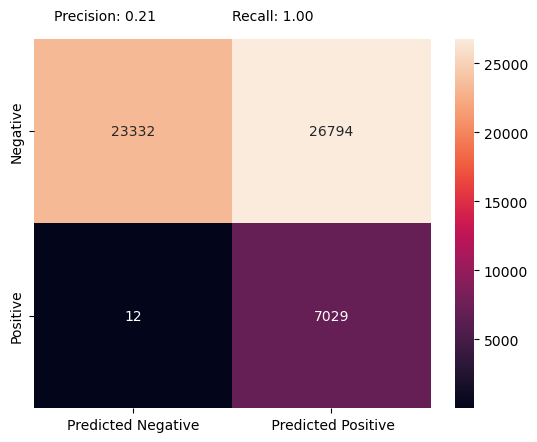

In [35]:
classification_report_and_confusion_matrix(y_val, y_proba_val, thresh=0.01)

              precision    recall  f1-score   support

           0      0.999     0.527     0.690     50126
           1      0.228     0.996     0.372      7041

    accuracy                          0.585     57167
   macro avg      0.614     0.762     0.531     57167
weighted avg      0.904     0.585     0.651     57167



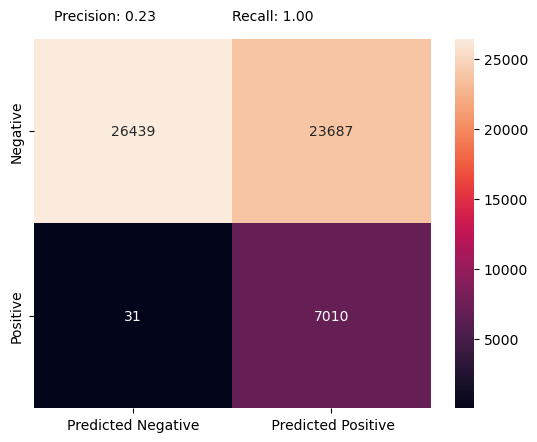

In [36]:
classification_report_and_confusion_matrix(y_val, y_proba_val, thresh=0.1)

              precision    recall  f1-score   support

           0      0.996     0.568     0.723     50126
           1      0.243     0.986     0.389      7041

    accuracy                          0.619     57167
   macro avg      0.620     0.777     0.556     57167
weighted avg      0.904     0.619     0.682     57167



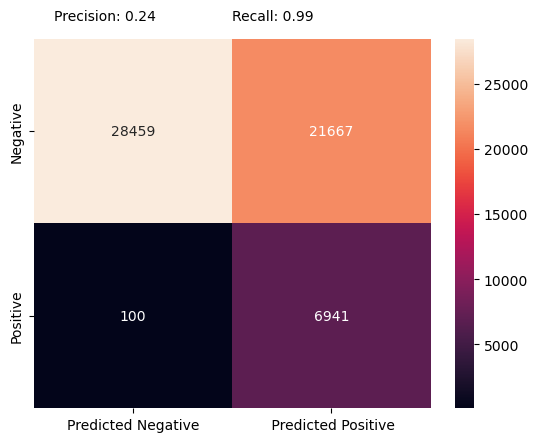

In [37]:
classification_report_and_confusion_matrix(y_val, y_proba_val, thresh=0.25)

              precision    recall  f1-score   support

           0      0.987     0.655     0.788     50126
           1      0.277     0.940     0.428      7041

    accuracy                          0.690     57167
   macro avg      0.632     0.797     0.608     57167
weighted avg      0.900     0.690     0.743     57167



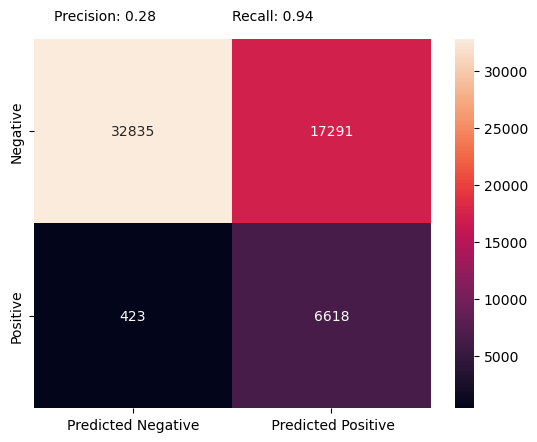

In [38]:
classification_report_and_confusion_matrix(y_val, y_proba_val, thresh=0.5)

              precision    recall  f1-score   support

           0      0.925     0.866     0.895     50126
           1      0.343     0.497     0.406      7041

    accuracy                          0.821     57167
   macro avg      0.634     0.682     0.650     57167
weighted avg      0.853     0.821     0.834     57167



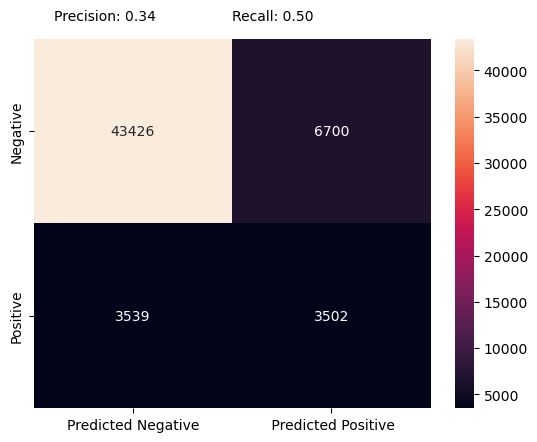

In [39]:
classification_report_and_confusion_matrix(y_val, y_proba_val, thresh=0.75)

*Threshold = 0.01* give us the best model for our purpose with the **highest Recall** (lower false negatives compared with 0.1 model, despite bit less Precision).

## Final prediction
We are ready to make our final prediction, using the **Class-weight correction** model with **Threshold = 0.01**

In [40]:
X_test = pred_df.values
X_train, y_train = _X_train, _y_train

thresh = 0.01

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

y_proba_test = lr.predict_proba(X_test)
y_pred_test = np.where(y_proba_test[:,1] > thresh, 1, 0)
Counter(y_pred_test)

Counter({1: 74733, 0: 52304})

In [41]:
test_result = pd.DataFrame({
    "id": pred_df.index.tolist(),
    "Response": y_pred_test
})
test_result.to_csv("./test_with_response.csv", index=False)